In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 1
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


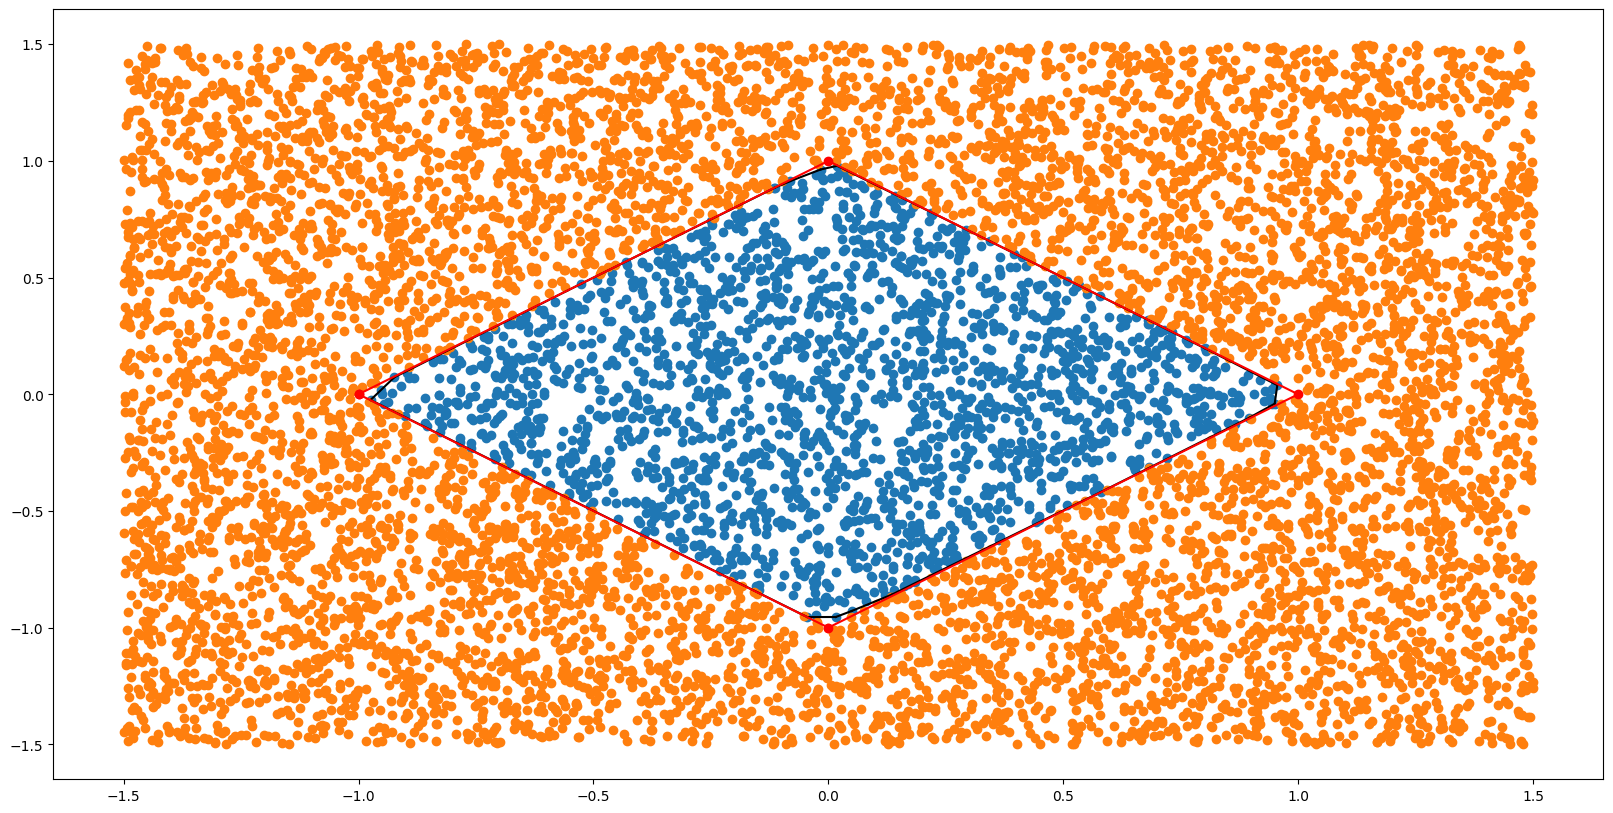

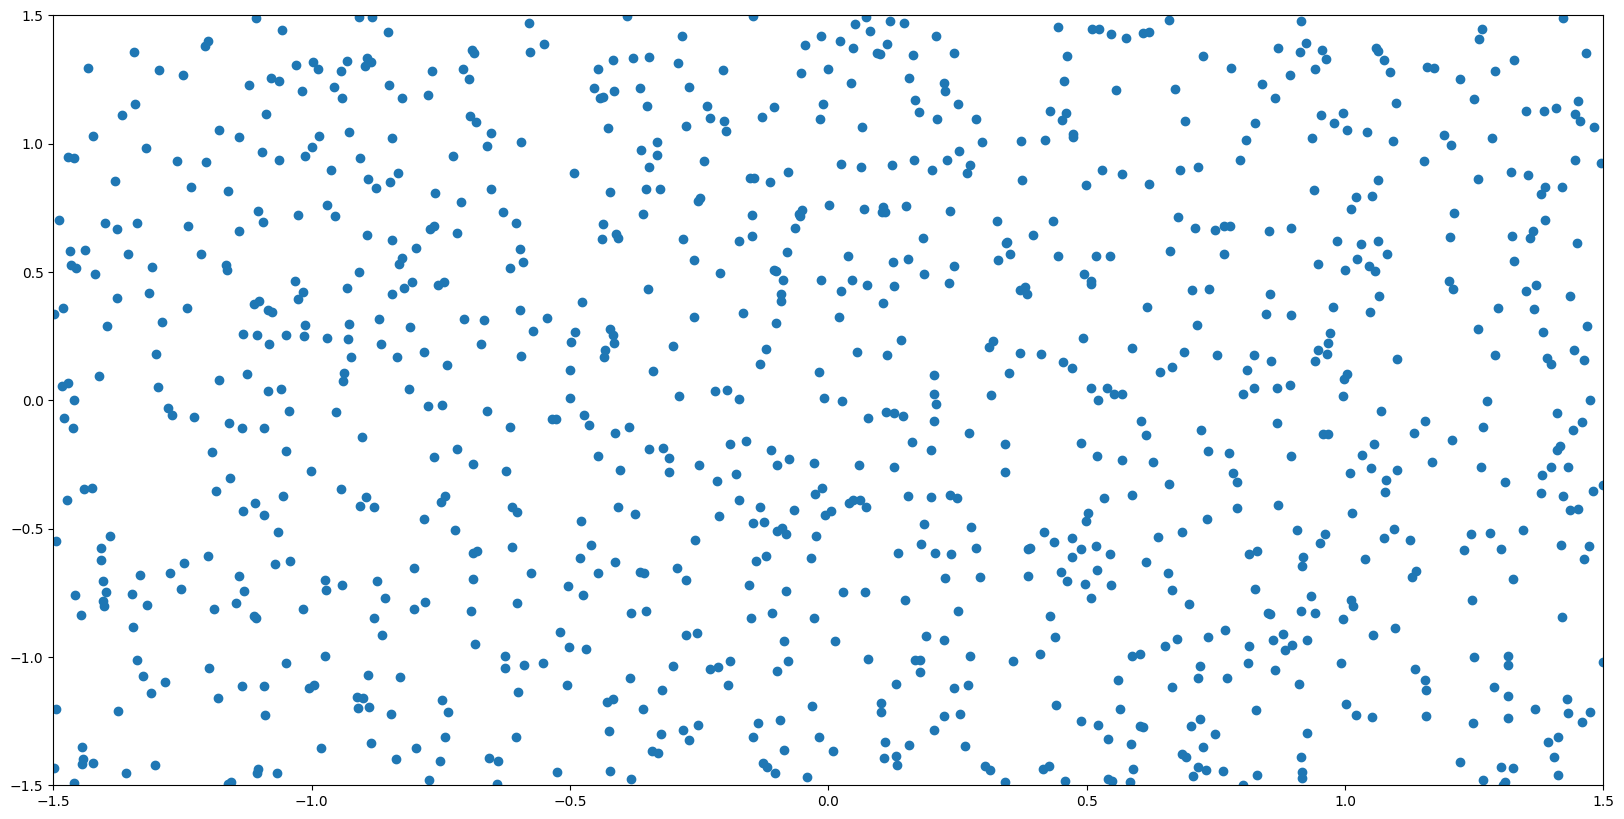

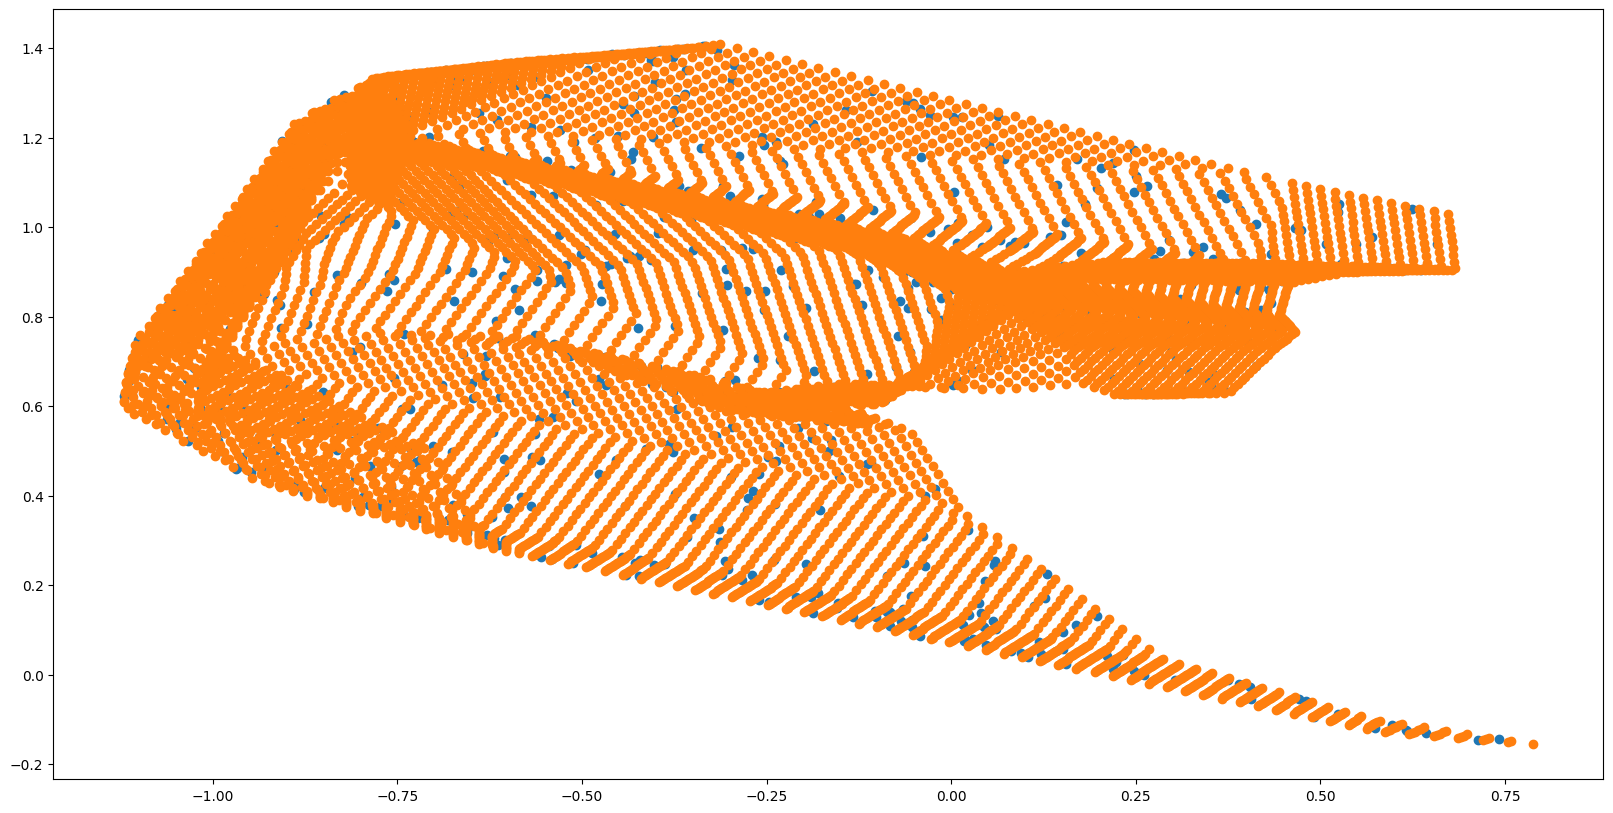

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [6]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs)


=== Epoch: 0===
batch = 0, mean loss = 1.8293229632429477, l_pos = 0.6278383001561899, l_neg = 0.7096861281149028, l_gen = 0.49179853497185494
batch = 100, mean loss = 1.8190755803054874, l_pos = 0.6832410759811308, l_neg = 0.559986244962279, l_gen = 0.5758482593620775
batch = 200, mean loss = 1.7375668646368942, l_pos = 0.6544663427921059, l_neg = 0.39598330410376675, l_gen = 0.6871172177410209
batch = 300, mean loss = 1.681310852043571, l_pos = 0.624171820254928, l_neg = 0.2924495371889666, l_gen = 0.7646894945996757
batch = 400, mean loss = 1.6439141218163134, l_pos = 0.6005809028288392, l_neg = 0.23199969142383478, l_gen = 0.8113335275636393
batch = 500, mean loss = 1.6106597875825959, l_pos = 0.5757646933689444, l_neg = 0.1930539228914319, l_gen = 0.8418411713222197
batch = 600, mean loss = 1.5832575648829037, l_pos = 0.5540588687709046, l_neg = 0.16573095189989834, l_gen = 0.8634677442121014
batch = 700, mean loss = 1.5585049747766369, l_pos = 0.533419143077761, l_neg = 0.1450399

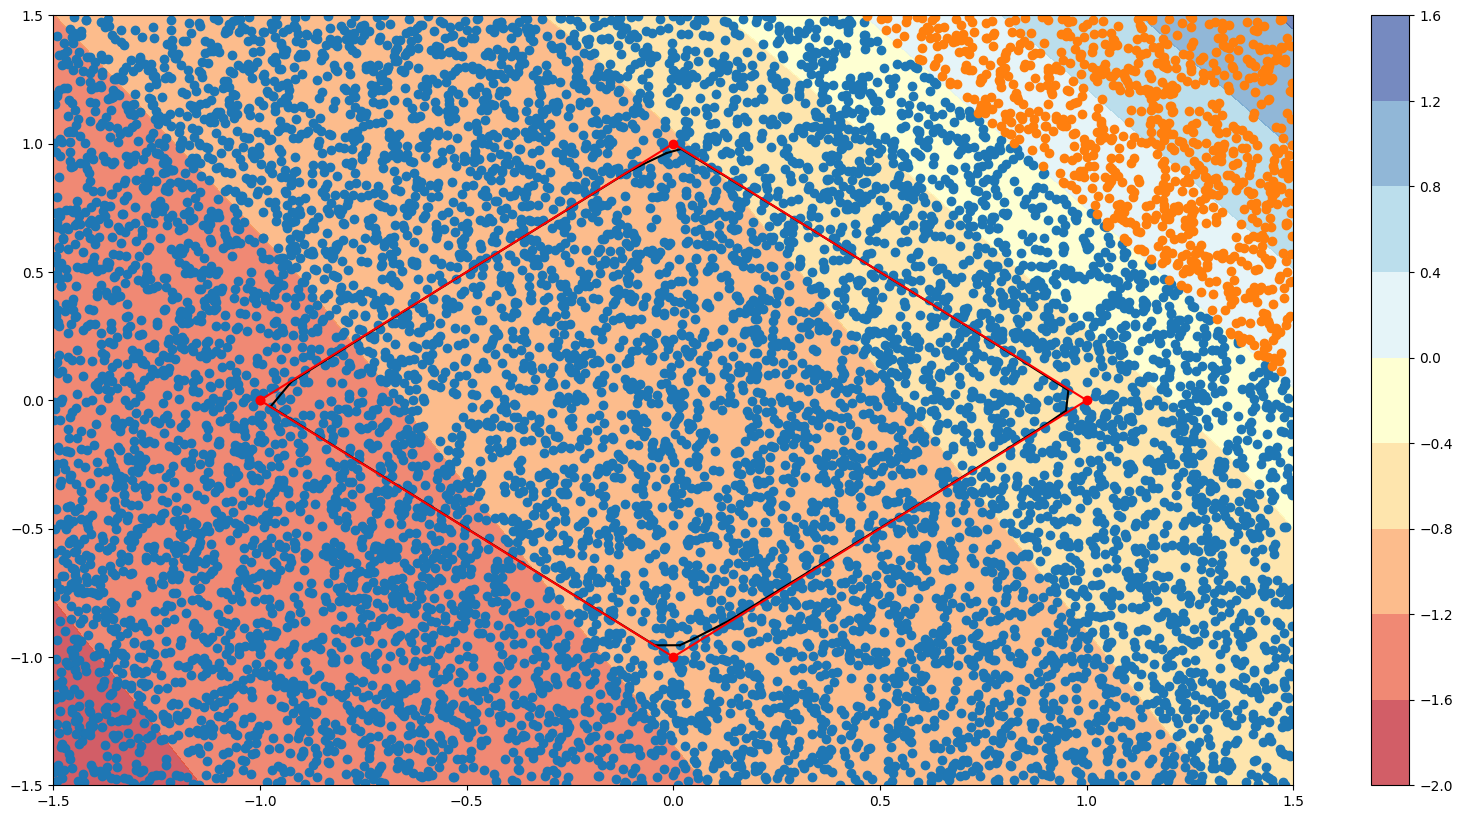

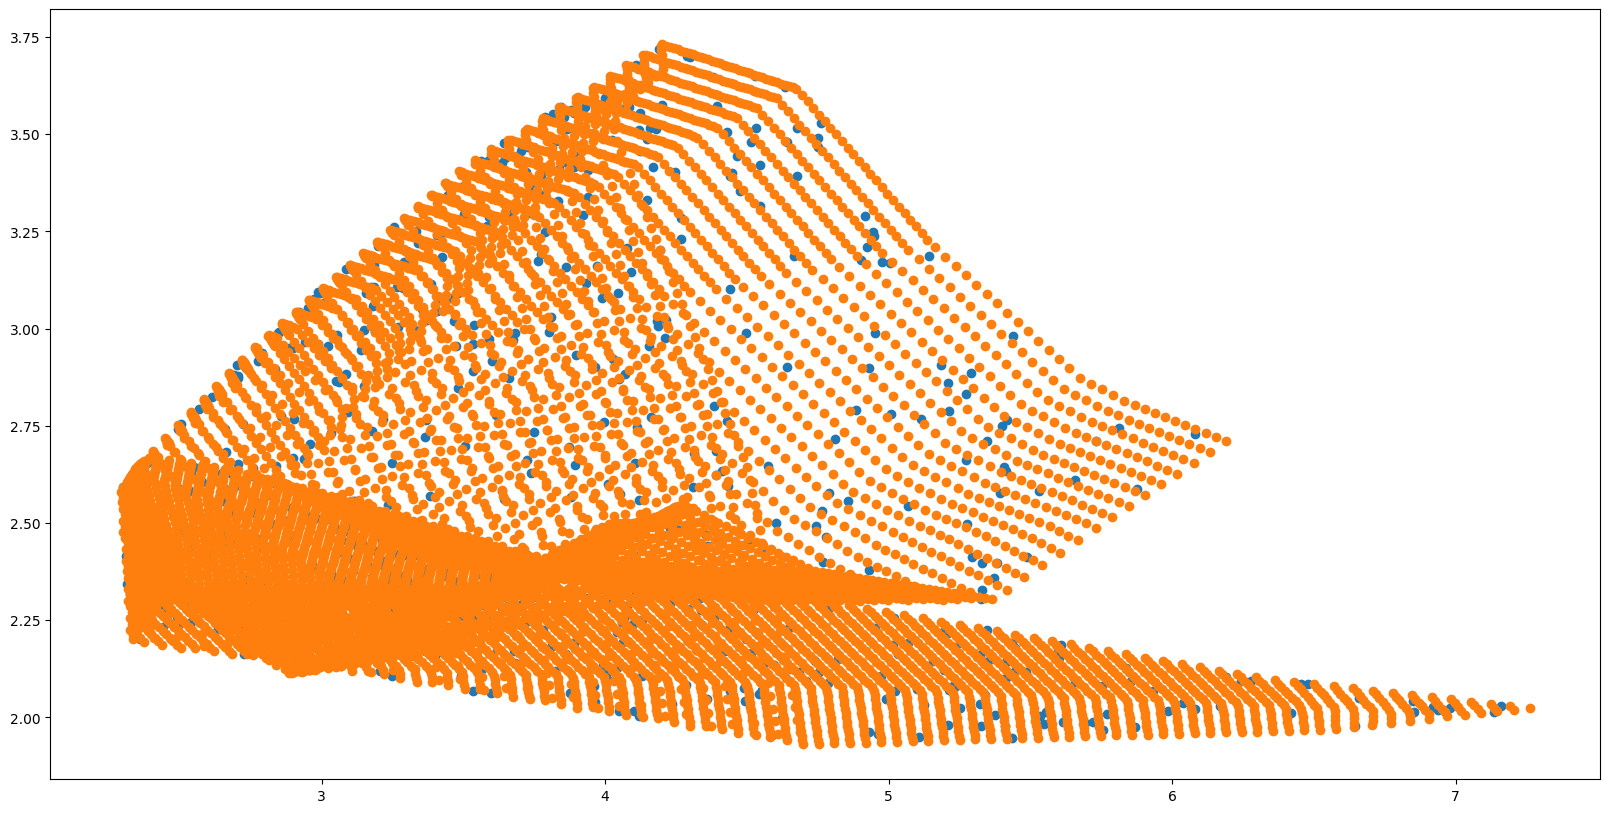

In [7]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [8]:
result = verification(icnn, sequential=False)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 383 nonzeros
Model fingerprint: 0x49a30c41
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [3e-04, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+02]
  RHS range        [8e-03, 1e+02]
Presolve removed 52 rows and 32 columns
Presolve time: 0.00s
Presolved: 86 rows, 64 columns, 316 nonzeros
Variable types: 44 continuous, 20 integer (20 binary)

Root relaxation: objective 5.132869e+01, 52 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

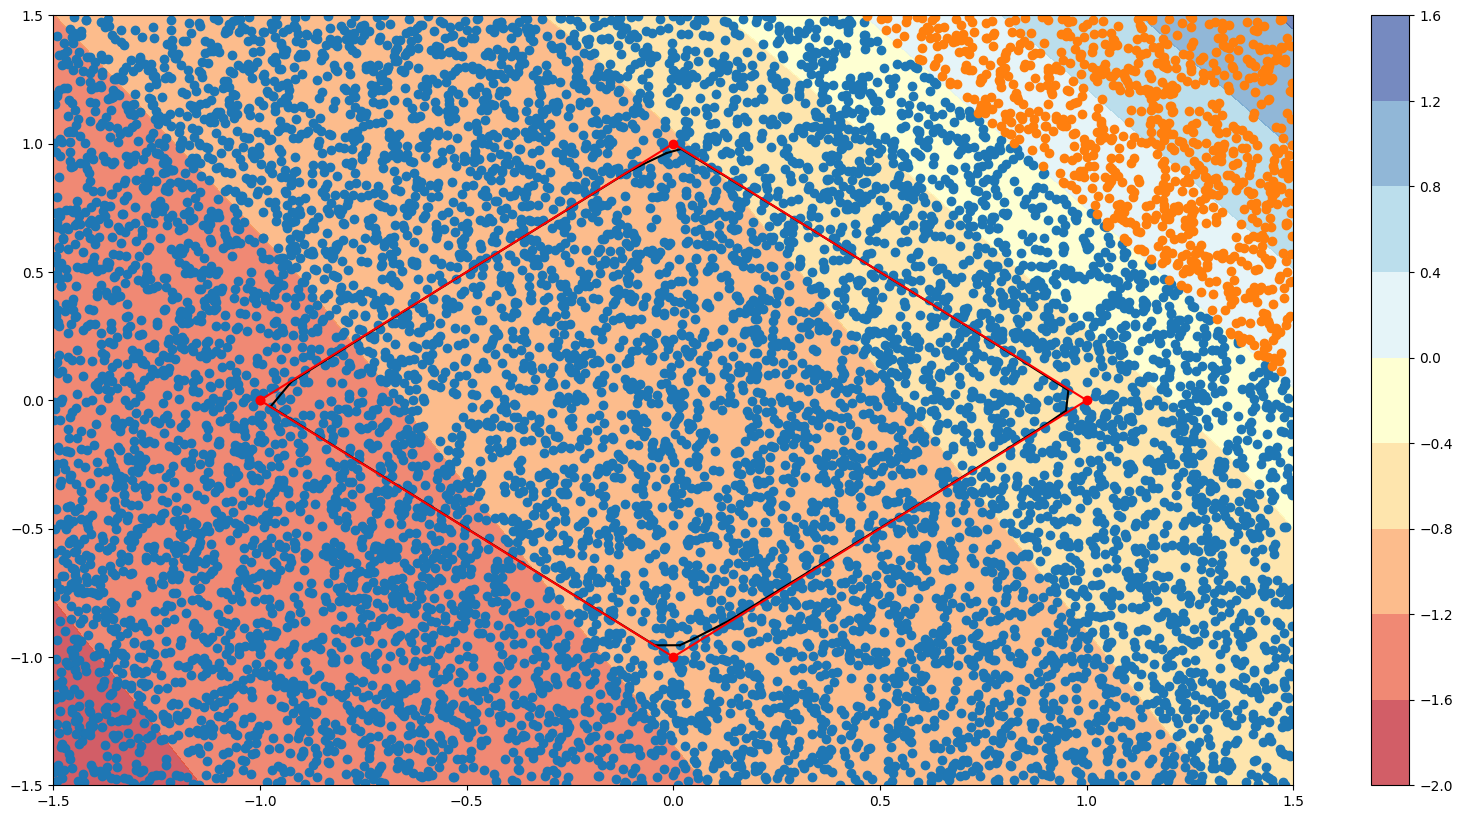

In [9]:
plots.c = result
plots.plt_mesh()